In [56]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.ion()
matplotlib.is_interactive()

True

In [57]:
ecomrce_purchases_data = pd.read_csv("./data/Ecommerce_Purchases.csv")

In [58]:
ecomrce_purchases_data.head()

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82


# Find the relationship between top 5 Job designation and total Purchase amount

In [59]:
ecomrce_purchases_job_sum = ecomrce_purchases_data[["Job", "Purchase Price"]].groupby("Job").agg({'Purchase Price': np.sum})
ecomrce_purchases_job_top_5 = ecomrce_purchases_job_sum.sort_values(by=['Purchase Price'], ascending=False).head(5)
ecomrce_purchases_job_top_5

,Purchase Price
Job,
Dietitian,1605.30
Lawyer,1603.85
Purchasing manager,1577.97
"Therapist, art",1526.31
Clinical cytogeneticist,1495.92


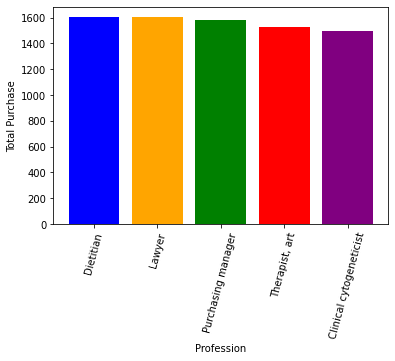

In [108]:
fig = plt.figure()

y = ecomrce_purchases_job_top_5.index
x = ecomrce_purchases_job_top_5["Purchase Price"]

colors = ['blue','orange','green','red','purple']

y_pos = np.arange(len(y))

plt.bar(y, x, color=colors)
plt.xlabel("Profession")
plt.ylabel("Total Purchase")
plt.xticks(y_pos, y, rotation=75)
plt.show()

# Find the relationship between Job designation and mean Purchase amount

In [61]:
ecomrce_purchases_job_mean = ecomrce_purchases_data[["Job", "Purchase Price"]].groupby("Job").mean()
ecomrce_purchases_job_top_5_mean = ecomrce_purchases_job_mean.sort_values(by=['Purchase Price'], ascending=False).head(5)
ecomrce_purchases_job_top_5_mean

,Purchase Price
Job,
Trade mark attorney,73.802727
Translator,70.777647
Investment analyst,69.090000
"Accountant, chartered management",69.082667
"Designer, industrial/product",68.714667


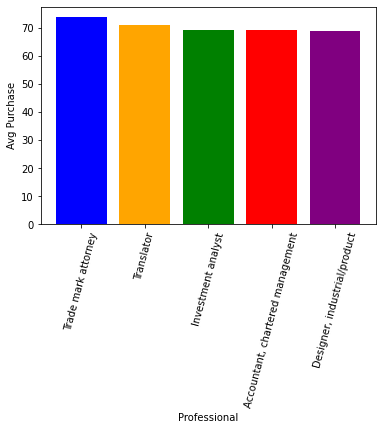

In [107]:
fig = plt.figure()

y = ecomrce_purchases_job_top_5_mean.index
x = ecomrce_purchases_job_top_5_mean["Purchase Price"]

colors = ['blue','orange','green','red','purple']

y_pos = np.arange(len(y))

plt.bar(y, x, color=colors)
plt.xlabel("Professional")
plt.ylabel("Avg Purchase")
plt.xticks(y_pos, y, rotation=75)
plt.show()

# How does purchase value depend on the Internet Browser used and Job (Profession) of the purchaser?

In [67]:
ecomrce_purchases_data["Browser"] = pd.Series(ecomrce_purchases_data["Browser Info"]).str.split("/").str[0]

ecomrce_purchases_job_count = ecomrce_purchases_data[["Job", "Purchase Price"]].groupby("Job").agg("count")
ecomrce_purchases_job_count_top_5 = ecomrce_purchases_job_count.sort_values(by=['Purchase Price'], ascending=False).head(5)
jobs = ecomrce_purchases_job_count_top_5.index

browsers = ecomrce_purchases_data["Browser"].drop_duplicates().values

ecomrce_purchases_job_count_by_browsers = []
for i in browsers:
    ecomrce_purchases_job_count_browser = ecomrce_purchases_data[ecomrce_purchases_data["Browser"] == i][["Job", "Purchase Price"]].groupby(["Job"]).agg("sum")
    item = ecomrce_purchases_job_count_browser.filter(items=jobs, axis=0) 
    ecomrce_purchases_job_count_by_browsers.append(item)

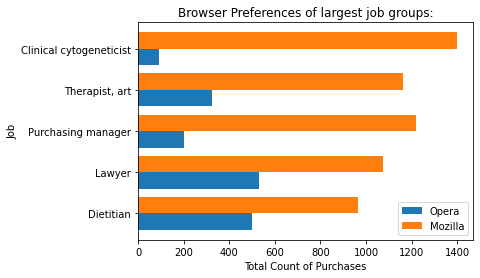

In [95]:
Y_axis = np.arange(len(states))

for i in range(len(browsers)):
    if(i % 2 == 0):
        pos = (-1) *(0.2)
    else:
        pos = (0.2)
    plt.barh(Y_axis + pos, ecomrce_purchases_job_count_by_browsers[i]["Purchase Price"], 0.4, label = browsers[i])
  
plt.yticks(Y_axis, jobs)
plt.xlabel("Total Count of Purchases")
plt.ylabel("Job")
plt.title("Browser Preferences of largest job groups:")
plt.legend()
plt.show()

In [69]:
ecomrce_purchases_data["Browser"] = pd.Series(ecomrce_purchases_data["Browser Info"]).str.split("/").str[0]

ecomrce_purchases_job_sum = ecomrce_purchases_data[["Job", "Purchase Price"]].groupby("Job").agg({'Purchase Price': np.sum})
ecomrce_purchases_job_top_5 = ecomrce_purchases_job_sum.sort_values(by=['Purchase Price'], ascending=False).head(5)
jobs = ecomrce_purchases_job_top_5.index

browsers = ecomrce_purchases_data["Browser"].drop_duplicates().values

ecomrce_purchases_job_by_browsers = []
for i in browsers:
    ecomrce_purchases_job_time_browser = ecomrce_purchases_data[ecomrce_purchases_data["Browser"] == i][["Job", "Purchase Price"]].groupby(["Job"]).agg("sum")
    item = ecomrce_purchases_job_time_browser.filter(items=jobs, axis=0) 
    ecomrce_purchases_job_by_browsers.append(item)
    print(item)

                         Purchase Price
Job                                    
Dietitian                        332.58
Lawyer                           530.88
Purchasing manager               498.32
Therapist, art                   433.37
Clinical cytogeneticist           87.42
                         Purchase Price
Job                                    
Dietitian                       1272.72
Lawyer                          1072.97
Purchasing manager              1079.65
Therapist, art                  1092.94
Clinical cytogeneticist         1408.50


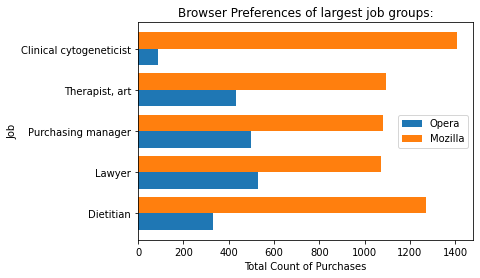

In [94]:
Y_axis = np.arange(len(states))

for i in range(len(browsers)):
    if(i % 2 == 0):
        pos = (-1) *(0.2)
    else:
        pos = (0.2)
    plt.barh(Y_axis + pos, ecomrce_purchases_job_by_browsers[i]["Purchase Price"], 0.4, label = browsers[i])
  
plt.yticks(Y_axis, jobs)
plt.xlabel("Total Count of Purchases")
plt.ylabel("Job")
plt.title("Browser Preferences of largest job groups:")
plt.legend()
plt.show()

# What are the patterns, if any, on the purchases based on Location (State) and time of purchase (AM or PM)?

In [84]:
ecomrce_purchases_data["State"] = ecomrce_purchases_data["Address"].apply(lambda x: x.split(",")[-1].split()[-2])
ecomrce_purchases_state_time = ecomrce_purchases_data[["State", "Purchase Price"]].groupby(["State"]).agg("count")
ecomrce_purchases_state_time_top_5 = ecomrce_purchases_state_time.sort_values(by=['Purchase Price'], ascending=False).head(5)
states = ecomrce_purchases_state_time_top_5.index

ecomrce_purchases_state_time_am = ecomrce_purchases_data[ecomrce_purchases_data["AM or PM"] == "AM"][["State", "Purchase Price"]].groupby(["State"]).agg("sum")
am = ecomrce_purchases_state_time_am.filter(items=states, axis=0)

ecomrce_purchases_state_time_pm = ecomrce_purchases_data[ecomrce_purchases_data["AM or PM"] == "PM"][["State", "Purchase Price"]].groupby(["State"]).agg("sum")
pm = ecomrce_purchases_state_time_pm.filter(items=states, axis=0) 

print("Number purchase in AM by State\n", am)
am
print("Number purchase in PM by State\n", pm)
pm

Number purchase in AM by State
        Purchase Price
State                
AP           10456.75
AA            8716.44
AE            8589.00
IN            4222.81
VI            3725.96
Number purchase in PM by State
        Purchase Price
State                
AP            9107.23
AA            9380.43
AE            7798.21
IN            5192.59
VI            4578.66


,Purchase Price
State,
AP,9107.23
AA,9380.43
AE,7798.21
IN,5192.59
VI,4578.66


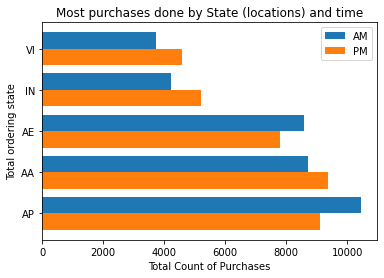

In [85]:
Y_axis = np.arange(len(states))

plt.barh(Y_axis + 0.2, am["Purchase Price"], 0.4, label = 'AM')
plt.barh(Y_axis - 0.2, pm["Purchase Price"], 0.4, label = 'PM')
  
plt.yticks(Y_axis, states)
plt.xlabel("Total Count of Purchases")
plt.ylabel("Total ordering state")
plt.title("Most purchases done by State (locations) and time")
plt.legend()
plt.show()

# How does purchase depend on ‘CC’ provider and time of purchase ‘AM or PM’?

In [86]:
ecomrce_purchases_ccprovider_time = ecomrce_purchases_data[["CC Provider", "Purchase Price"]].groupby(["CC Provider"]).agg("count")
ccproviders = ecomrce_purchases_ccprovider_time.index

ecomrce_count_ccproviders_time_am = ecomrce_purchases_data[ecomrce_purchases_data["AM or PM"] == "AM"][["CC Provider", "Purchase Price"]].groupby(["CC Provider"]).agg("sum")
am = ecomrce_count_ccproviders_time_am.filter(items=ccproviders, axis=0)

ecomrce_count_ccproviders_time_pm = ecomrce_purchases_data[ecomrce_purchases_data["AM or PM"] == "PM"][["CC Provider", "Purchase Price"]].groupby(["CC Provider"]).agg("sum")
pm = ecomrce_count_ccproviders_time_pm.filter(items=ccproviders, axis=0)

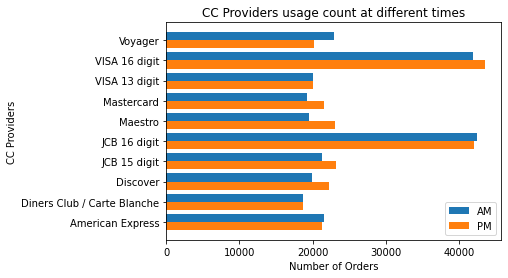

In [106]:
Y_axis = np.arange(len(ccproviders))

plt.barh(Y_axis + 0.2, am["Purchase Price"], 0.4, label = 'AM')
plt.barh(Y_axis - 0.2, pm["Purchase Price"], 0.4, label = 'PM')

plt.yticks(Y_axis, ccproviders)
plt.xlabel("Number of Orders")
plt.ylabel("CC Providers")
plt.title("CC Providers usage count at different times")
plt.legend()
plt.show()

In [88]:
ecomrce_purchases_ccprovider_time = ecomrce_purchases_data[["CC Provider", "Purchase Price"]].groupby(["CC Provider"]).agg("sum")
ccproviders = ecomrce_purchases_ccprovider_time.index

ecomrce_count_ccproviders_time_am = ecomrce_purchases_data[ecomrce_purchases_data["AM or PM"] == "AM"][["CC Provider", "Purchase Price"]].groupby(["CC Provider"]).agg("sum")
am = ecomrce_count_ccproviders_time_am.filter(items=ccproviders, axis=0)

ecomrce_count_ccproviders_time_pm = ecomrce_purchases_data[ecomrce_purchases_data["AM or PM"] == "PM"][["CC Provider", "Purchase Price"]].groupby(["CC Provider"]).agg("sum")
pm = ecomrce_count_ccproviders_time_pm.filter(items=ccproviders, axis=0)

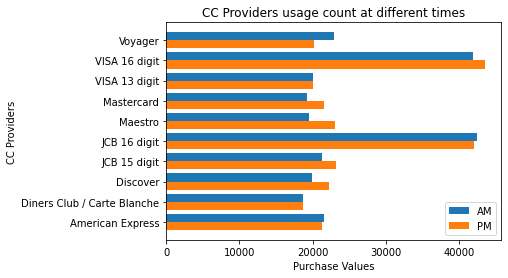

In [105]:
Y_axis = np.arange(len(ccproviders))

plt.barh(Y_axis + 0.2, am["Purchase Price"], 0.4, label = 'AM')
plt.barh(Y_axis - 0.2, pm["Purchase Price"], 0.4, label = 'PM')

plt.yticks(Y_axis, ccproviders)
plt.xlabel("Purchase Values")
plt.ylabel("CC Providers")
plt.title("CC Providers usage count at different times")
plt.legend()
plt.show()

# What are top 5 Location(State) for purchases?

In [90]:
ecomrce_purchases_data["State"] = ecomrce_purchases_data["Address"].apply(lambda x: x.split(",")[-1].split()[-2])
ecomrce_purchases_state_count = ecomrce_purchases_data[["State", "Purchase Price"]].groupby("State").agg("count")
ecomrce_purchases_state_count_top_5 = ecomrce_purchases_state_time.sort_values(by=['Purchase Price'], ascending=False).head(5)
ecomrce_purchases_state_count_top_5

,Purchase Price
State,
AP,376
AA,351
AE,331
IN,183
VI,178


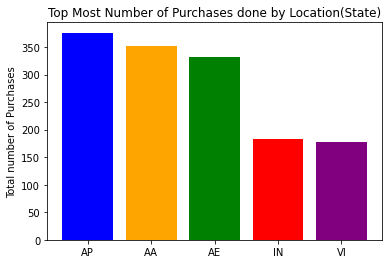

In [101]:
fig = plt.figure()

y = ecomrce_purchases_state_count_top_5.index
x = ecomrce_purchases_state_count_top_5["Purchase Price"]

colors = ['blue','orange','green','red','purple']

y_pos = np.arange(len(y))

plt.bar(y, x, color=colors)
plt.ylabel("Total number of Purchases")
plt.xticks(y_pos, y)
plt.title("Top Most Number of Purchases done by Location(State)")
plt.show()

In [92]:
ecomrce_purchases_data["State"] = ecomrce_purchases_data["Address"].apply(lambda x: x.split(",")[-1].split()[-2])
ecomrce_purchases_state_sum = ecomrce_purchases_data[["State", "Purchase Price"]].groupby("State").agg("sum")
ecomrce_purchases_state_sum_top_5 = ecomrce_purchases_state_time.sort_values(by=['Purchase Price'], ascending=False).head(5)
ecomrce_purchases_state_sum_top_5

,Purchase Price
State,
AP,376
AA,351
AE,331
IN,183
VI,178


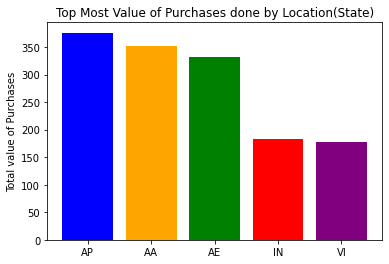

In [102]:
fig = plt.figure()

y = ecomrce_purchases_state_sum_top_5.index
x = ecomrce_purchases_state_sum_top_5["Purchase Price"]

colors = ['blue','orange','green','red','purple']

y_pos = np.arange(len(y))

plt.bar(y, x, color=colors)
plt.ylabel("Total value of Purchases")
plt.xticks(y_pos, y)
plt.title("Top Most Value of Purchases done by Location(State)")
plt.show()